In [145]:
import acquire
from sklearn.model_selection import train_test_split
from IPython.display import Markdown, Latex

# 4.In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

    print the first 3 rows
    print the number of rows and columns (shape)
    print the column names
    print the data type of each column
    print the summary statistics for each of the numeric variables

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data


In [147]:
df = acquire.get_iris_data()
print(df.head(3))
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())

csv file found and loaded
   species_id  measurement_id  sepal_length  sepal_width  petal_length  \
0           1               1           5.1          3.5           1.4   
1           1               2           4.9          3.0           1.4   
2           1               3           4.7          3.2           1.3   

   petal_width species_name  
0          0.2       setosa  
1          0.2       setosa  
2          0.2       setosa  
(150, 7)
Index(['species_id', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_name'],
      dtype='object')
species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object
       species_id  measurement_id  sepal_length  sepal_width  petal_length  \
count  150.000000      150.000000    150.000000   150.000000    150.000000   
mean     2.000000       75.500000      5.843333  

# 5.Read the data from this google sheet into a dataframe, df_google.

    print the first 3 rows
    print the number of rows and columns
    print the column names
    print the data type of each column
    print the summary statistics for each of the numeric variables
    print the unique values for each of your categorical variables

In [148]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [149]:
df_google = pd.read_csv(csv_export_url)
df_google.head(3)
print(df_google.shape)
print(df_google.columns)
print(df_google.dtypes)
print(df_google.describe())
print(df_google.nunique())


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000   

# 6.Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

    assign the first 100 rows to a new dataframe, df_excel_sample
    print the number of rows of your original dataframe
    print the first 5 column names
    print the column names that have a data type of object
    compute the range for each of the numeric variables.

In [150]:
df_google.to_excel('google_sheet.xlsx')
df_excel = pd.read_excel('google_sheet.xlsx')

df_excel_sample = df_excel.head(100)
print(df_excel.shape)
print(df_excel.columns[0:5])
print(df_excel.select_dtypes('object').columns)
print(df_excel.describe())

(891, 13)
Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
       Unnamed: 0  PassengerId    Survived      Pclass         Age  \
count  891.000000   891.000000  891.000000  891.000000  714.000000   
mean   445.000000   446.000000    0.383838    2.308642   29.699118   
std    257.353842   257.353842    0.486592    0.836071   14.526497   
min      0.000000     1.000000    0.000000    1.000000    0.420000   
25%    222.500000   223.500000    0.000000    2.000000   20.125000   
50%    445.000000   446.000000    0.000000    3.000000   28.000000   
75%    667.500000   668.500000    1.000000    3.000000   38.000000   
max    890.000000   891.000000    1.000000    3.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000 

In [151]:
df_excel.describe().loc['max'] - df_excel.describe().loc['min']

Unnamed: 0     890.0000
PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [152]:
df_telco = acquire.get_telco_churn()

csv file found and loaded


In [153]:
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [154]:
titanic = acquire.get_titanic_data()

csv file found and loaded


In [155]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


Using the Iris Data:

Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.

Rename the species_name column to just species.

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [156]:
iris = acquire.get_iris_data()


csv file found and loaded


In [157]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [158]:
iris = iris.drop(columns=['species_id', 'measurement_id'])

In [159]:
iris = iris.rename(columns={'species_name': 'species'})

In [160]:
num=iris.select_dtypes(include="number")
char=iris.select_dtypes(include="object")

In [161]:
num.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [162]:
char_dummy = pd.get_dummies(char)
char =pd.concat([char, char_dummy], axis=1)
char

,species,species_setosa,species_versicolor,species_virginica
0,setosa,1,0,0
1,setosa,1,0,0
2,setosa,1,0,0
3,setosa,1,0,0
4,setosa,1,0,0
5,setosa,1,0,0
6,setosa,1,0,0
7,setosa,1,0,0
8,setosa,1,0,0
9,setosa,1,0,0


In [163]:
iris_clean = pd.concat([num, char], axis=1)

In [164]:
iris_clean

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


# Using the Telco dataset

# Use the function defined in acquire.py to load the Telco data.

# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [165]:
telco = acquire.get_telco_churn()
telco = telco.drop(columns=['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])
telco['senior_citizen'] = telco['senior_citizen'].replace({0: 'No', 1: 'Yes'})
telco

csv file found and loaded


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,No,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,Male,No,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,Male,No,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,Yes,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,Yes,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,Male,No,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,No,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,No,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [166]:
telco['total_charges'] = telco['total_charges'].replace({' ': 0})
telco['total_charges'] = telco['total_charges'].astype('float')

In [167]:
num=telco.select_dtypes(include="number")
char=telco.select_dtypes(include="object")
char = pd.get_dummies(char, drop_first = True)
telco_clean = pd.concat([num, char], axis=1)
telco_clean

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.60,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.90,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,13,55.15,742.90,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,22,85.10,1873.70,1,0,1,0,1,0,1,...,1,1,1,0,0,1,0,0,1,0
7040,2,50.30,92.75,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,67,67.85,4627.65,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1


Split your data

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [168]:
iris_clean

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [169]:
train,validate, test = acquire.test_train(iris_clean, "species")
print(train.shape)
print(validate.shape)
print(test.shape)

(90, 8)
(30, 8)
(30, 8)


In [170]:
train,validate, test = acquire.test_train(titanic, "survived")
print(train.shape)
print(validate.shape)
print(test.shape)


(534, 13)
(178, 13)
(179, 13)


In [171]:
train, validate, test = acquire.test_train(telco_clean, "churn_Yes")
print(train.shape)
print(validate.shape)
print(test.shape)


(4225, 31)
(1409, 31)
(1409, 31)


In [172]:
acquire.prep_telco()

csv file found and loaded


,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.60,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.90,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.90,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.00,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.90,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,13,55.15,742.90,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,22,85.10,1873.70,1,0,1,0,1,0,1,...,1,1,1,0,0,1,0,0,1,0
7040,2,50.30,92.75,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,67,67.85,4627.65,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1


# Part 1

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

* 1.Acquire, prepare & split your data.

* 2.Univariate Stats

    * For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

    * For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

    * Document takeaways & any actions.

# 3.Bivariate Stats

   * Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

   * For each measurement type, compute the descriptive statistics for each species.

   * For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups.
     Do the same for the other measurement types.

   * Document takeaways & any actions.



# 4.Multivariate Stats

    * Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    * Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

    * Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure.
    Add another dimension using color to represent species. Document takeaways from this visualization.

    * Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa?
    Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    * Document takeaways and any actions.

In [173]:
# 1.Acquire, prepare & split your data.
iris_db = acquire.prep_iris()
train, validate, test = acquire.test_train(iris_db, "species")
print(train.shape)
print(validate.shape)
print(test.shape)


csv file found and loaded
(90, 8)
(30, 8)
(30, 8)


In [174]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns[:-3]:
    print(col)
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

sepal_length
sepal_width
petal_length
petal_width
species


SPECIES
count             90
unique             3
top       versicolor
freq              30
Name: species, dtype: object
versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: species, dtype: float64


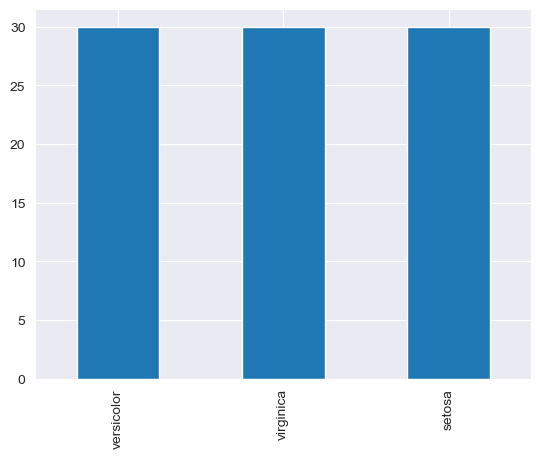

In [175]:
# univariate stats
for col in col_cat:
    print(col.upper())
    print(train[col].describe())
    print(train[col].value_counts(normalize=True))
    train[col].value_counts().plot.bar()
    plt.show()
    print()

SEPAL_LENGTH
count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
Axes(0.125,0.11;0.775x0.77)


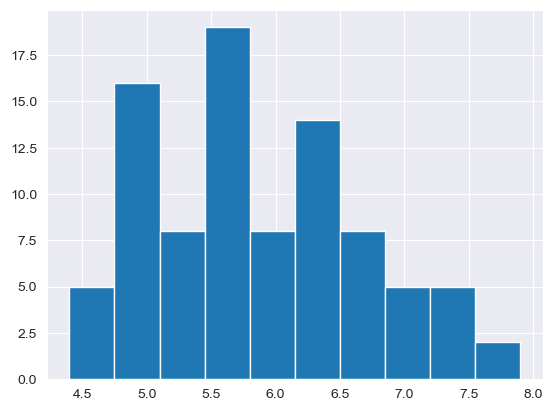

SEPAL_WIDTH
count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64
Axes(0.125,0.11;0.775x0.77)


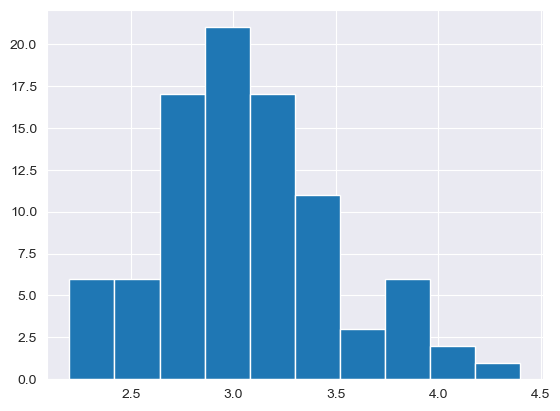

PETAL_LENGTH
count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
Axes(0.125,0.11;0.775x0.77)


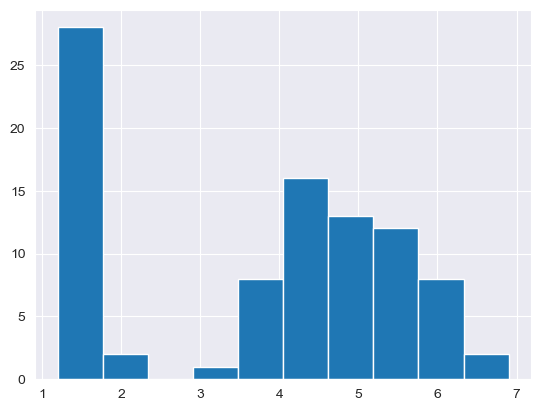

PETAL_WIDTH
count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
Axes(0.125,0.11;0.775x0.77)


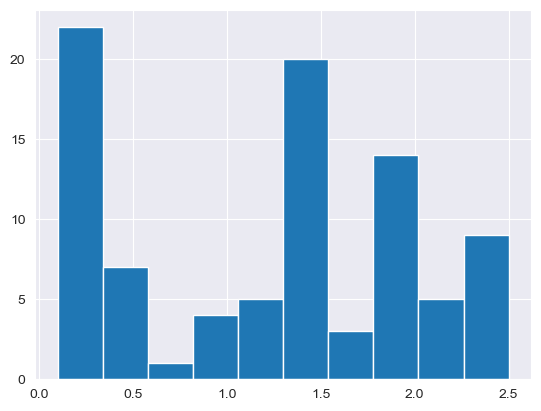

In [176]:
for col in col_num:
    print(col.upper())
    print(train[col].describe())
    print(train[col].hist())
    plt.show()

# bivariate stats

SEPAL_LENGTH
count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


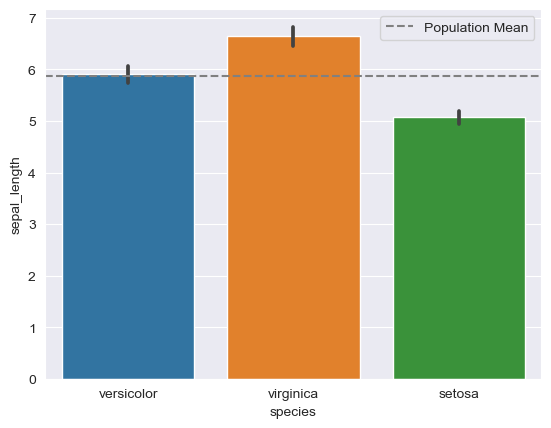


SEPAL_WIDTH
count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64


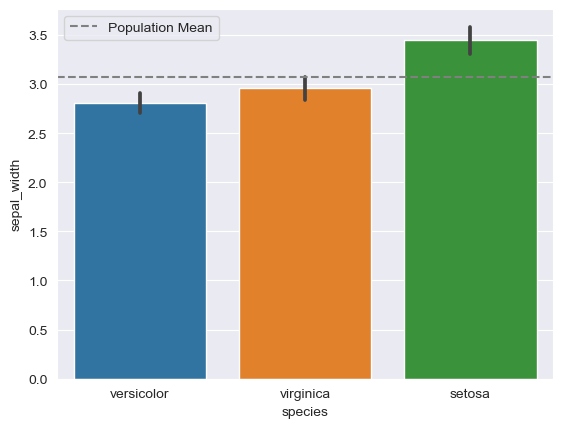


PETAL_LENGTH
count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


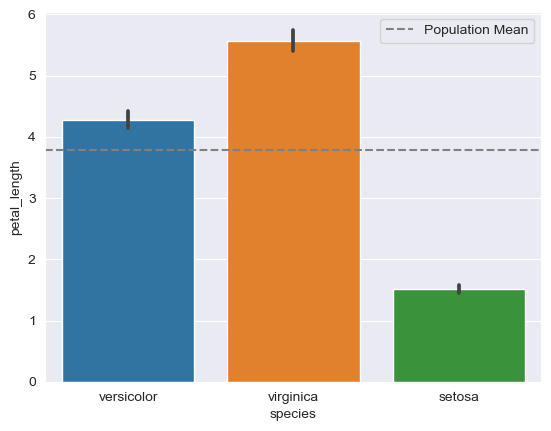


PETAL_WIDTH
count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


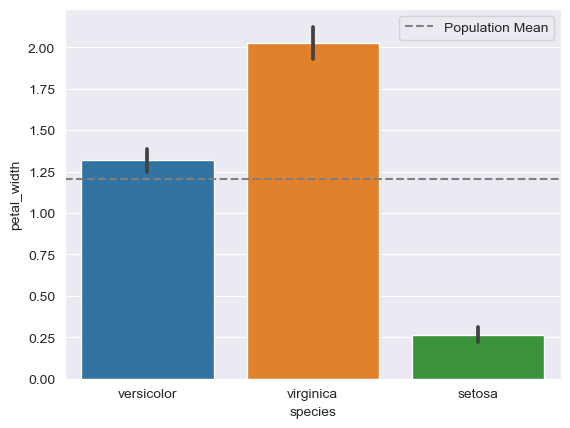

In [177]:
# bivariate stats
for col in col_num:
    print(col.upper())
    print(train[col].describe())
    pop_mean = train[col].mean()
    sns.barplot(data=train, x="species", y=col)
    plt.axhline(pop_mean, ls='--', color='gray', label='Population Mean')
    plt.legend()
    plt.show()
    print()

In [178]:
from scipy.stats import mannwhitneyu as mwu

In [179]:
mann = mwu(train[train.species == "virginica"].petal_width, train[train.species == "versicolor"].petal_width)
mann

MannwhitneyuResult(statistic=883.0, pvalue=1.274471779403707e-10)

In [180]:
# comparing virginica and versicolor
# $h_{o}$: there is no correlation between virginica and versicolor
# $h_{a}$: there is a correlation between virginica and versicolor
for col in col_num:
    stat, p = mwu(train[train.species == "virginica"][col], train[train.species == "versicolor"][col])
    print(col.upper())
    print(f'$h_o$: there is no correlation between virginica {col.upper()} and versicolor {col.upper()}')
    print(f'$h_a$: there is a correlation between virginica {col.upper()} and versicolor {col.upper()}')
    print(f"stat = {stat}, p = {p}")
    acquire.eval_results(p)

SEPAL_LENGTH
$h_o$: there is no correlation between virginica SEPAL_LENGTH and versicolor SEPAL_LENGTH
$h_a$: there is a correlation between virginica SEPAL_LENGTH and versicolor SEPAL_LENGTH
stat = 767.0, p = 2.7482419419191076e-06
We reject the null hypothesis
SEPAL_WIDTH
$h_o$: there is no correlation between virginica SEPAL_WIDTH and versicolor SEPAL_WIDTH
$h_a$: there is a correlation between virginica SEPAL_WIDTH and versicolor SEPAL_WIDTH
stat = 575.0, p = 0.06370930409956933
We fail to reject the null hypothesis
PETAL_LENGTH
$h_o$: there is no correlation between virginica PETAL_LENGTH and versicolor PETAL_LENGTH
$h_a$: there is a correlation between virginica PETAL_LENGTH and versicolor PETAL_LENGTH
stat = 892.5, p = 6.02995793051305e-11
We reject the null hypothesis
PETAL_WIDTH
$h_o$: there is no correlation between virginica PETAL_WIDTH and versicolor PETAL_WIDTH
$h_a$: there is a correlation between virginica PETAL_WIDTH and versicolor PETAL_WIDTH
stat = 883.0, p = 1.274471

In [181]:
# comparing virginica and setosa
for col in col_num:
    mann = mwu(train[train.species == "virginica"][col], train[train.species == "setosa"][col])
    print(col.upper())
    print(f'$h_o$: there is no correlation between virginica {col.upper()} and setosa {col.upper()}')
    print(f'$h_a$: there is a correlation between virginica {col.upper()} and setosa {col.upper()}')
    print(f"stat = {stat}, p = {p}")
    acquire.eval_results(p)

SEPAL_LENGTH
$h_o$: there is no correlation between virginica SEPAL_LENGTH and setosa SEPAL_LENGTH
$h_a$: there is a correlation between virginica SEPAL_LENGTH and setosa SEPAL_LENGTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypothesis
SEPAL_WIDTH
$h_o$: there is no correlation between virginica SEPAL_WIDTH and setosa SEPAL_WIDTH
$h_a$: there is a correlation between virginica SEPAL_WIDTH and setosa SEPAL_WIDTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypothesis
PETAL_LENGTH
$h_o$: there is no correlation between virginica PETAL_LENGTH and setosa PETAL_LENGTH
$h_a$: there is a correlation between virginica PETAL_LENGTH and setosa PETAL_LENGTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypothesis
PETAL_WIDTH
$h_o$: there is no correlation between virginica PETAL_WIDTH and setosa PETAL_WIDTH
$h_a$: there is a correlation between virginica PETAL_WIDTH and setosa PETAL_WIDTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypot

In [182]:
# comparing versicolor and setosa
for col in col_num:
    mann = mwu(train[train.species == "versicolor"][col], train[train.species == "setosa"][col])
    print(col.upper())
    print(f'$h_o$: there is no correlation between versicolor {col.upper()} and setosa {col.upper()}')
    print(f'$h_a$: there is a correlation between versicolor {col.upper()} and setosa {col.upper()}')
    print(f"stat = {stat}, p = {p}")
    acquire.eval_results(p)

SEPAL_LENGTH
$h_o$: there is no correlation between versicolor SEPAL_LENGTH and setosa SEPAL_LENGTH
$h_a$: there is a correlation between versicolor SEPAL_LENGTH and setosa SEPAL_LENGTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypothesis
SEPAL_WIDTH
$h_o$: there is no correlation between versicolor SEPAL_WIDTH and setosa SEPAL_WIDTH
$h_a$: there is a correlation between versicolor SEPAL_WIDTH and setosa SEPAL_WIDTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypothesis
PETAL_LENGTH
$h_o$: there is no correlation between versicolor PETAL_LENGTH and setosa PETAL_LENGTH
$h_a$: there is a correlation between versicolor PETAL_LENGTH and setosa PETAL_LENGTH
stat = 883.0, p = 1.274471779403707e-10
We reject the null hypothesis
PETAL_WIDTH
$h_o$: there is no correlation between versicolor PETAL_WIDTH and setosa PETAL_WIDTH
$h_a$: there is a correlation between versicolor PETAL_WIDTH and setosa PETAL_WIDTH
stat = 883.0, p = 1.274471779403707e-10
We reject the nu

# Bivariate Stats takeaways



In [183]:
abs(train.corr())

/var/folders/53/yp563cbn3r7g84qqyk6nd4140000gn/T/ipykernel_8810/482672279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(train.corr())


,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,0.152049,0.868360,0.819404,0.722981,0.030914,0.692068
sepal_width,0.152049,1.000000,0.470085,0.401092,0.614112,0.429335,0.184777
petal_length,0.868360,0.470085,1.000000,0.958664,0.927439,0.200454,0.726985
petal_width,0.819404,0.401092,0.958664,1.000000,0.881671,0.109817,0.771854
species_setosa,0.722981,0.614112,0.927439,0.881671,1.000000,0.500000,0.500000
species_versicolor,0.030914,0.429335,0.200454,0.109817,0.500000,1.000000,0.500000
species_virginica,0.692068,0.184777,0.726985,0.771854,0.500000,0.500000,1.000000


# 3.Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

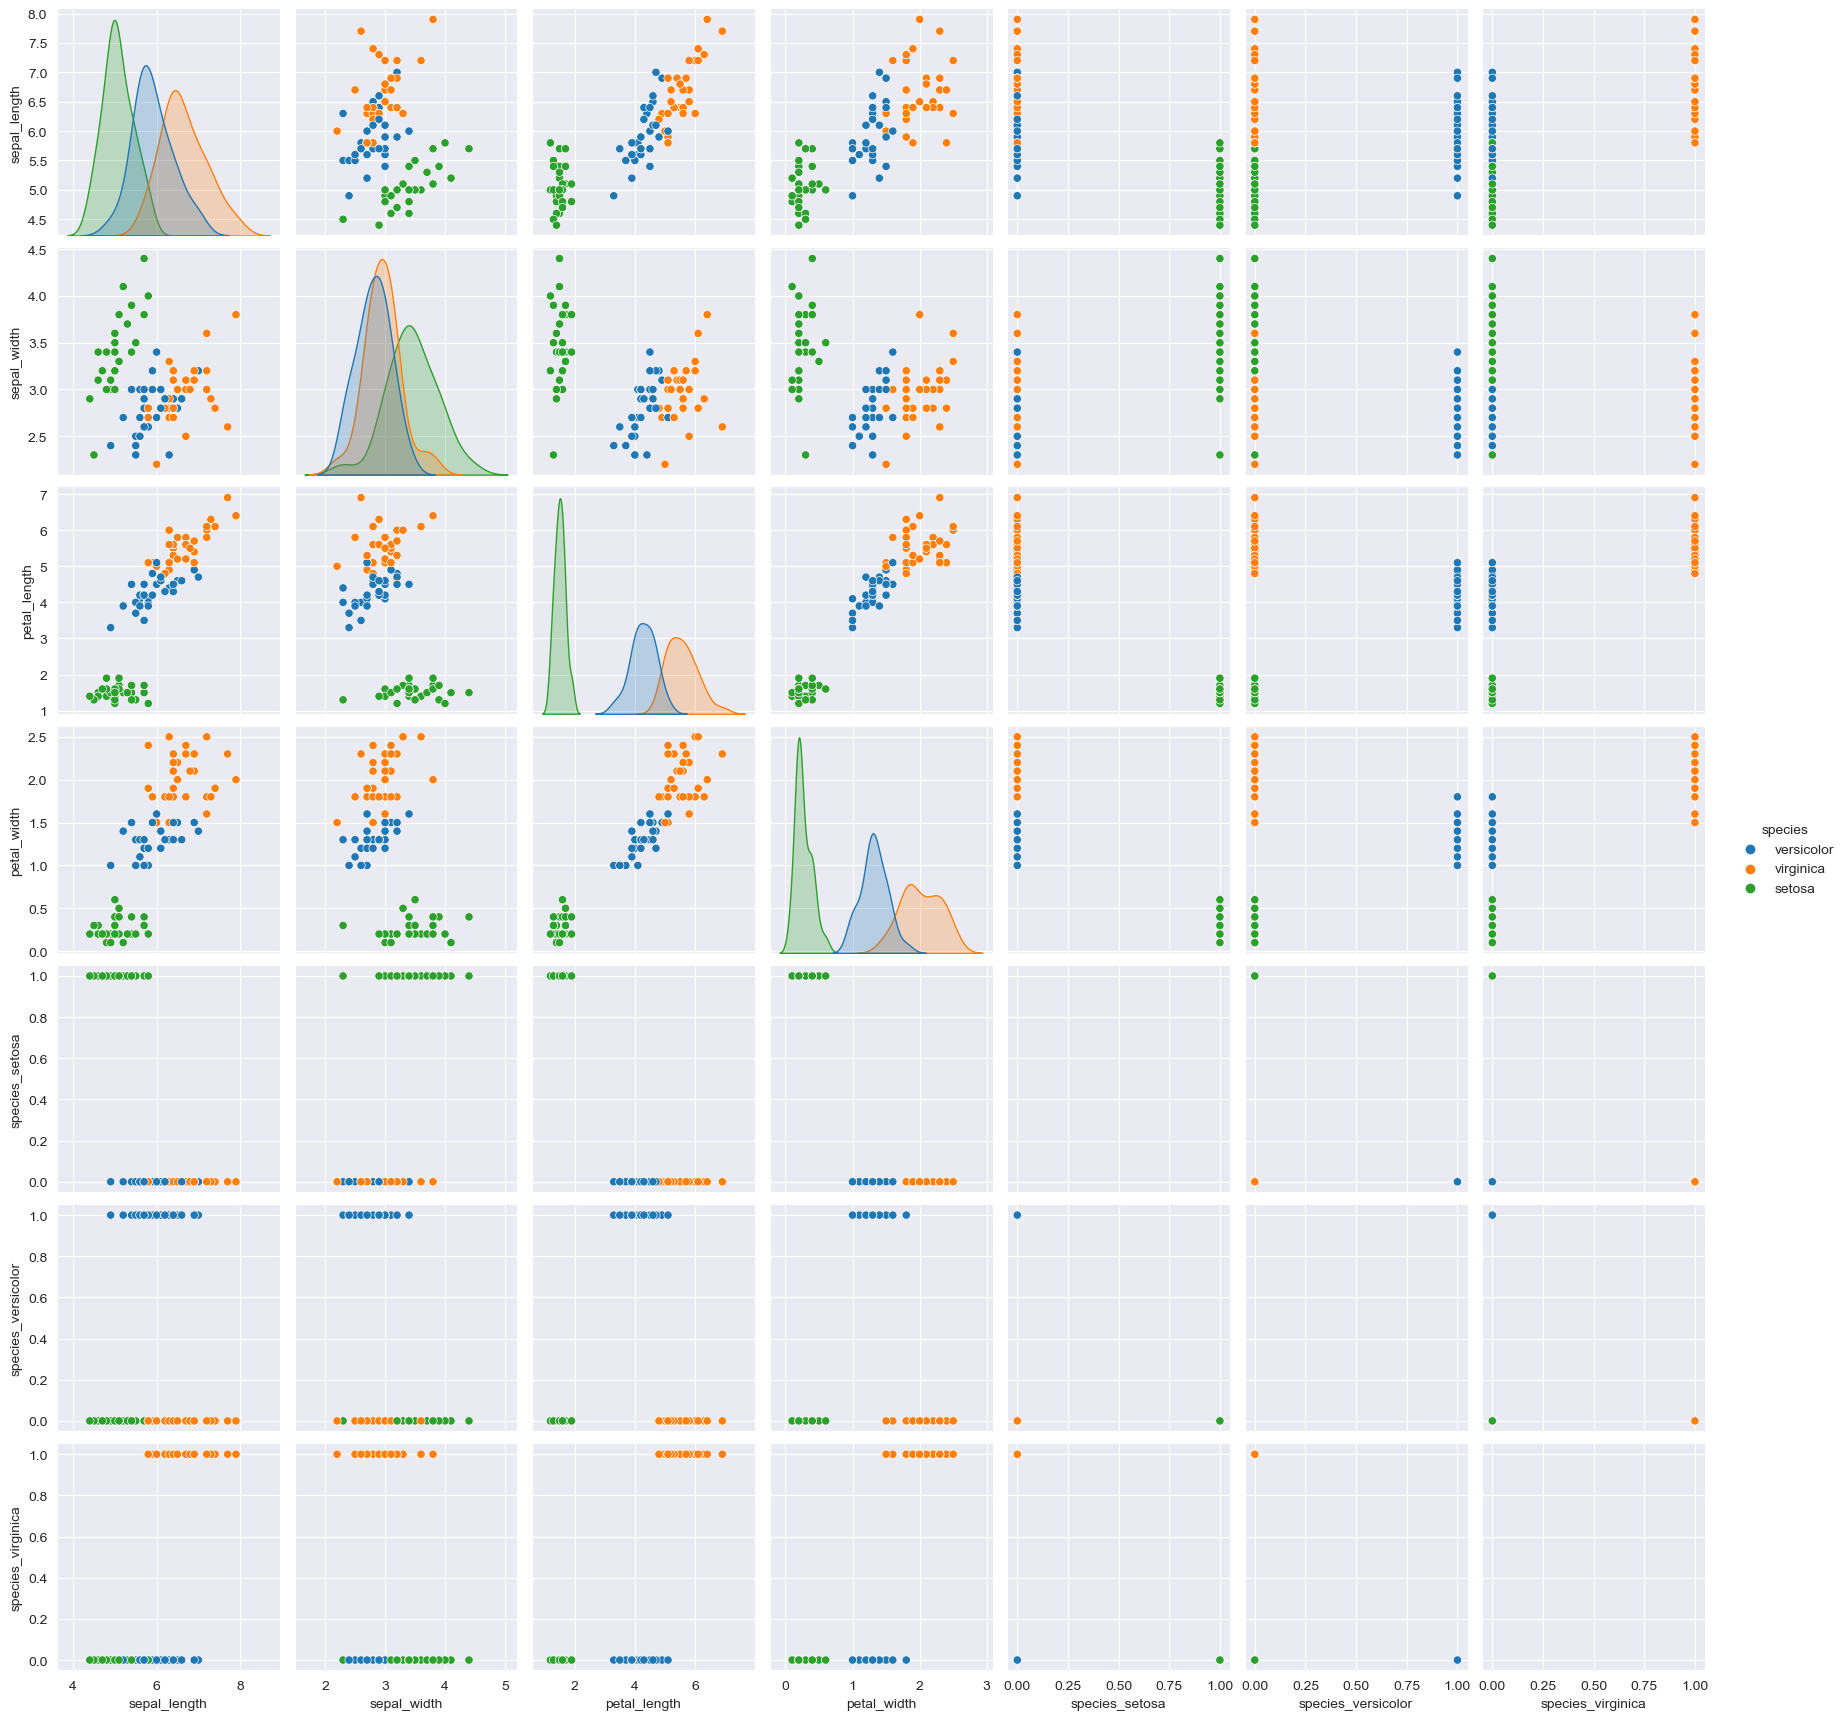

In [184]:
sns.pairplot(train, hue="species")
plt.show()

# Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

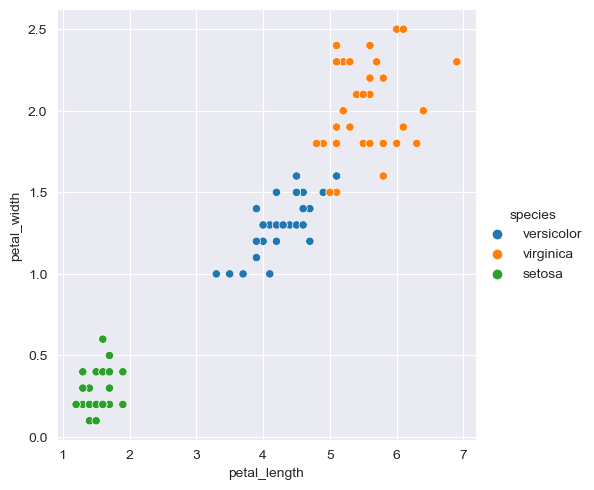

In [185]:
sns.relplot(data=train, x="petal_length", y="petal_width", hue="species")

# Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure.

In [220]:
train_melt = train.melt(id_vars=["species"], var_name="measurement", value_name="value")
train_melt
swarm = sns.swarmplot(data=train_melt, x="measurement", y="value", hue="species")

KeyError: "The following 'id_vars' are not present in the DataFrame: ['species']"

# Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa?
   * Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

$H_{o}$: there is no correlation between virginica petal length  and setosa petal length
$H_{a}$: there is a correlation between virginica petal lengthand setosa petal length


In [187]:
stat, p = mwu(train[train.species == "virginica"].petal_length, train[train.species == "setosa"].petal_length)
print(f"stat = {stat}, p = {p}")
acquire.eval_results(p)

stat = 900.0, p = 2.709796969910182e-11
We reject the null hypothesis


<Axes: xlabel='sepal_length', ylabel='Count'>

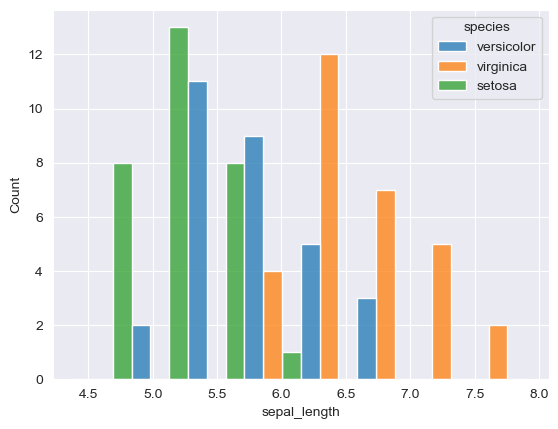

In [188]:

# 2.Univariate Stats
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
sns.histplot(data=train, x="sepal_length", hue="species", multiple='dodge')

<Axes: xlabel='sepal_width', ylabel='Count'>

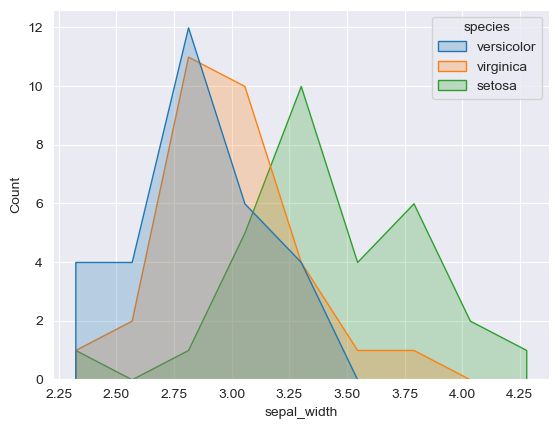

In [189]:
sns.histplot(data=train, x="sepal_width", hue="species", element="poly")

<Axes: xlabel='petal_length', ylabel='Count'>

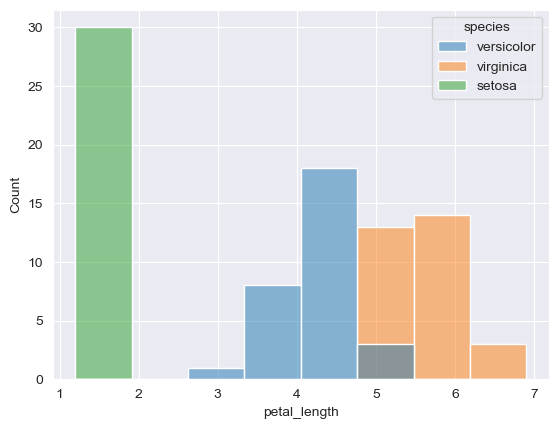

In [190]:
sns.histplot(data=train, x="petal_length", hue="species")

<Axes: xlabel='petal_width', ylabel='Count'>

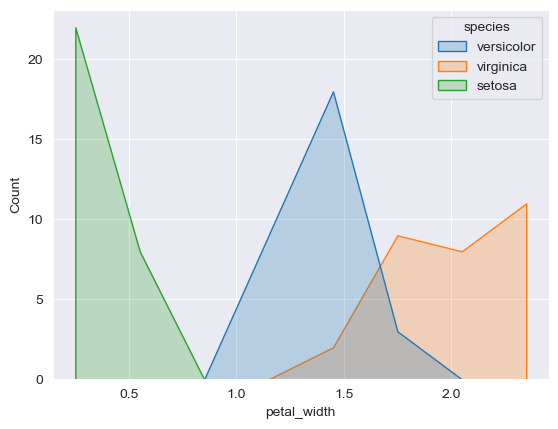

In [191]:
sns.histplot(data=train, x="petal_width", hue="species", element="poly")

<Axes: xlabel='species', ylabel='sepal_length'>

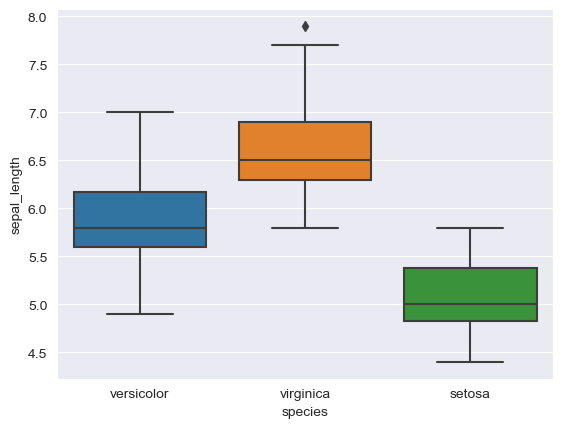

In [192]:
sns.boxplot(data=train, x="species", y="sepal_length")

<Axes: xlabel='species', ylabel='sepal_width'>

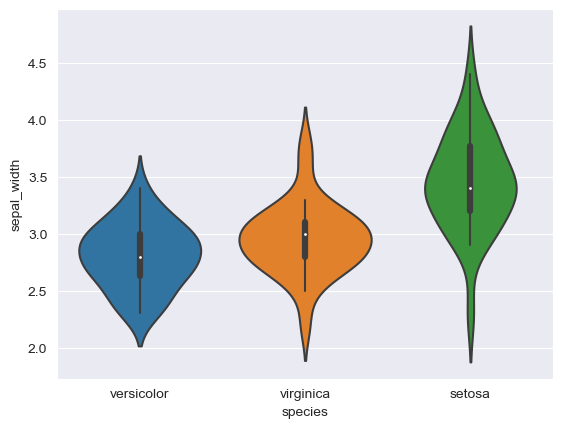

In [193]:
sns.violinplot(data=train, x="species", y="sepal_width")

<Axes: xlabel='species', ylabel='petal_length'>

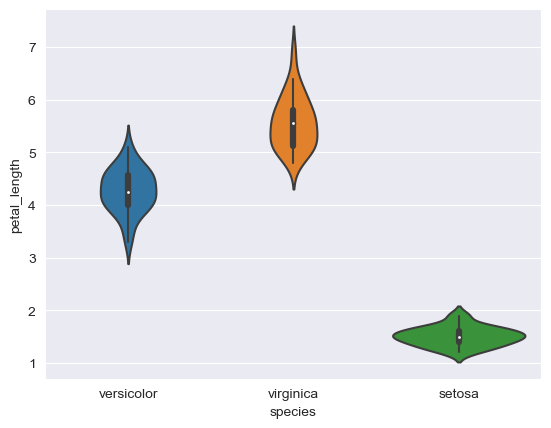

In [194]:
sns.violinplot(data=train, x="species", y="petal_length")

<Axes: xlabel='species', ylabel='petal_width'>

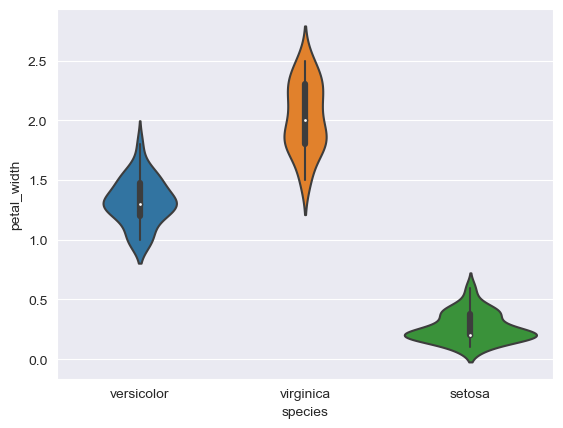

In [195]:
sns.violinplot(data=train, x="species", y="petal_width")

In [196]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.875556,3.070000,3.782222,1.203333,0.333333,0.333333,0.333333
std,0.792282,0.436135,1.742114,0.755422,0.474045,0.474045,0.474045
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.225000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.375000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [197]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
train['species'].value_counts()

versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

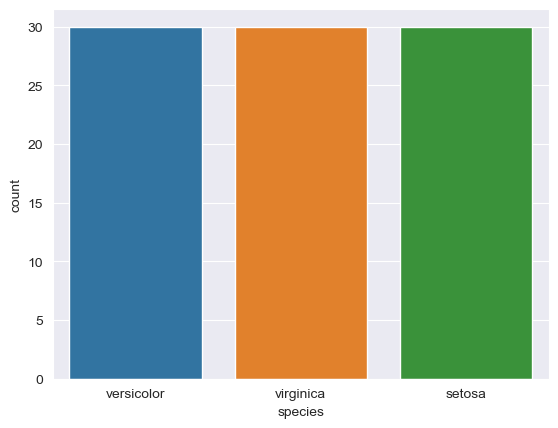

In [198]:
sns.countplot(data=train, x="species")

In [199]:
# Document takeaways & any actions.


# Part II

# Explore your titanic dataset more completely.

    Determine drivers of the target variable
    Determine if certain columns should be dropped
    Determine if it would be valuable to bin some numeric columns
    Determine if it would be valuable to combine multiple columns into one.

# Does it make sense to combine any features?
yes, i combined

# Do you find any surprises?
yes, didnt expect electronic check to be a huge driver of churn

# Document any and all findings and takeaways in your notebook using markdown.



# Part III
    Explore your telco data to discover drivers of churn
    Determine if certain columns should be dropped
    Determine if it would be valuable to bin some numeric columns
    Determine if it would be valuable to combine multiple columns into one.
# What are your drivers of churn?

# Does it make sense to combine any features?

# Do you find any surprises?

# Document any and all findings and takeaways in your notebook using markdown.

In [200]:
telco = acquire.prep_telco()
train, validate, test = acquire.test_train(telco, "churn_Yes")

csv file found and loaded


In [201]:
train.head()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,26,39.95,1023.75,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2479,47,26.90,1250.85,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
5889,1,50.45,50.45,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
6087,69,60.05,4176.70,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
785,51,87.55,4475.90,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0


In [202]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns[:-3]:
    print(col)
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

tenure
monthly_charges
total_charges
gender_Male
senior_citizen_Yes
partner_Yes
dependents_Yes
phone_service_Yes
multiple_lines_No phone service
multiple_lines_Yes
online_security_No internet service
online_security_Yes
online_backup_No internet service
online_backup_Yes
device_protection_No internet service
device_protection_Yes
tech_support_No internet service
tech_support_Yes
streaming_tv_No internet service
streaming_tv_Yes
streaming_movies_No internet service
streaming_movies_Yes
paperless_billing_Yes
churn_Yes
contract_type_One year
contract_type_Two year
internet_service_type_Fiber optic
internet_service_type_None


GENDER_MALE
count    4225.000000
mean        0.508639
std         0.499985
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender_Male, dtype: float64
1    0.508639
0    0.491361
Name: gender_Male, dtype: float64


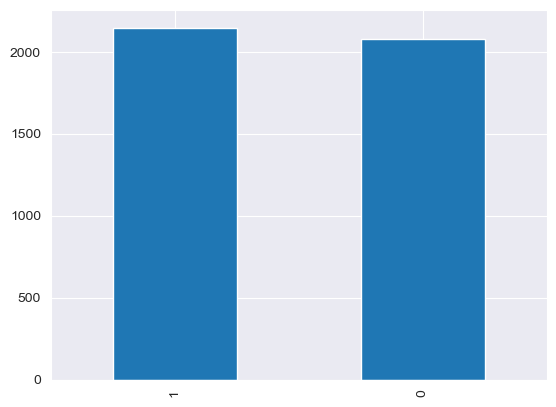


SENIOR_CITIZEN_YES
count    4225.000000
mean        0.161893
std         0.368397
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen_Yes, dtype: float64
0    0.838107
1    0.161893
Name: senior_citizen_Yes, dtype: float64


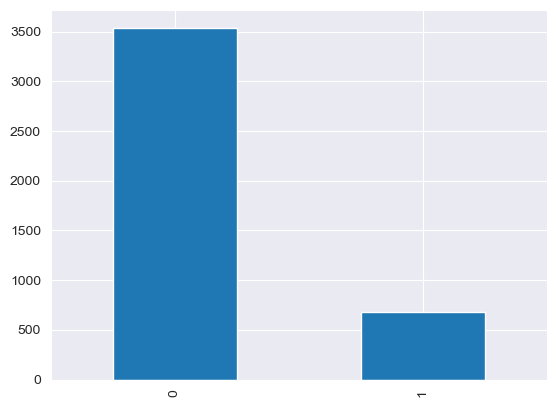


PARTNER_YES
count    4225.000000
mean        0.488521
std         0.499927
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner_Yes, dtype: float64
0    0.511479
1    0.488521
Name: partner_Yes, dtype: float64


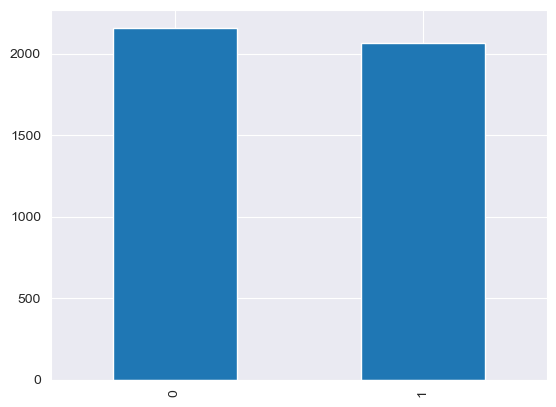


DEPENDENTS_YES
count    4225.000000
mean        0.306272
std         0.460999
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dependents_Yes, dtype: float64
0    0.693728
1    0.306272
Name: dependents_Yes, dtype: float64


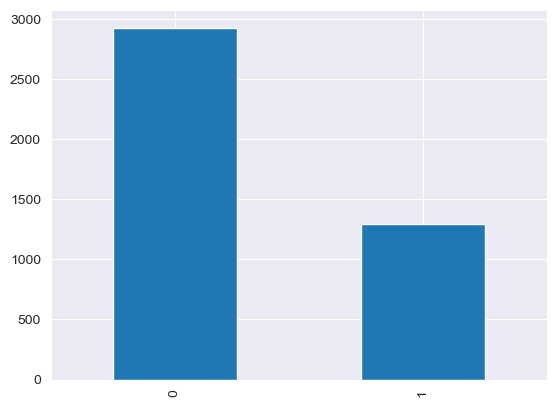


PHONE_SERVICE_YES
count    4225.000000
mean        0.906982
std         0.290492
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone_service_Yes, dtype: float64
1    0.906982
0    0.093018
Name: phone_service_Yes, dtype: float64


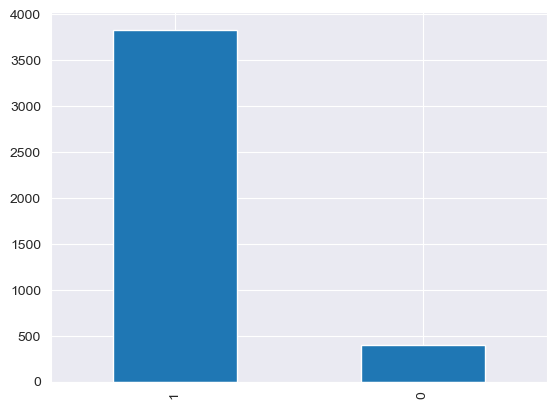


MULTIPLE_LINES_NO PHONE SERVICE
count    4225.000000
mean        0.093018
std         0.290492
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: multiple_lines_No phone service, dtype: float64
0    0.906982
1    0.093018
Name: multiple_lines_No phone service, dtype: float64


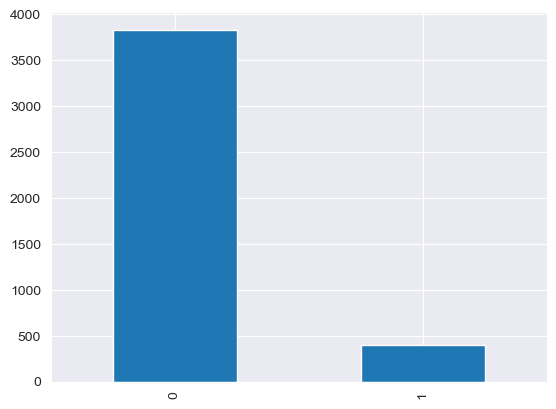


MULTIPLE_LINES_YES
count    4225.000000
mean        0.427692
std         0.494803
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: multiple_lines_Yes, dtype: float64
0    0.572308
1    0.427692
Name: multiple_lines_Yes, dtype: float64


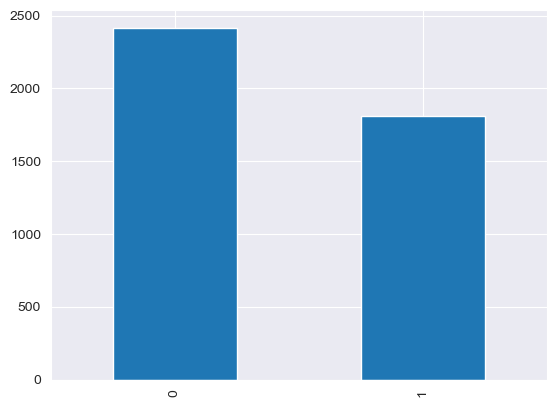


ONLINE_SECURITY_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: online_security_No internet service, dtype: float64
0    0.781538
1    0.218462
Name: online_security_No internet service, dtype: float64


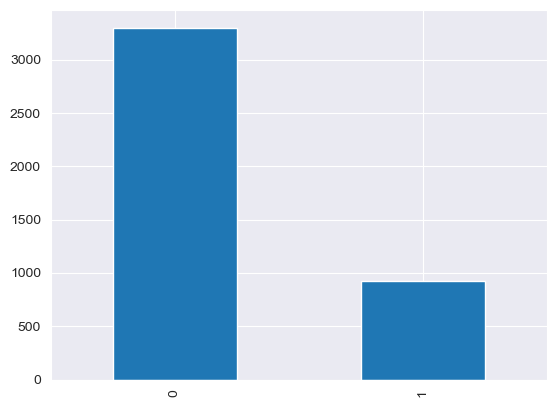


ONLINE_SECURITY_YES
count    4225.000000
mean        0.291598
std         0.454552
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: online_security_Yes, dtype: float64
0    0.708402
1    0.291598
Name: online_security_Yes, dtype: float64


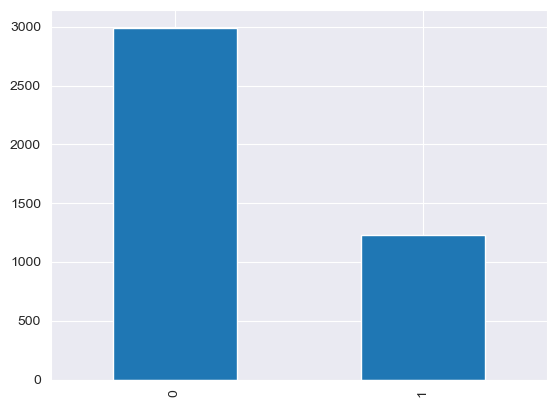


ONLINE_BACKUP_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: online_backup_No internet service, dtype: float64
0    0.781538
1    0.218462
Name: online_backup_No internet service, dtype: float64


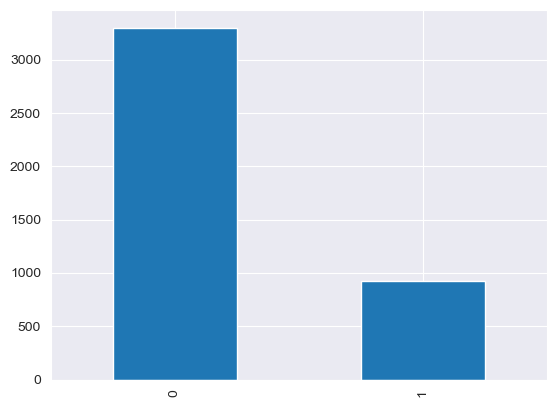


ONLINE_BACKUP_YES
count    4225.000000
mean        0.350059
std         0.477045
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: online_backup_Yes, dtype: float64
0    0.649941
1    0.350059
Name: online_backup_Yes, dtype: float64


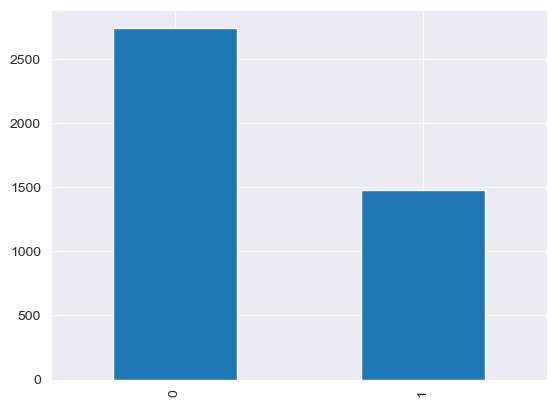


DEVICE_PROTECTION_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: device_protection_No internet service, dtype: float64
0    0.781538
1    0.218462
Name: device_protection_No internet service, dtype: float64


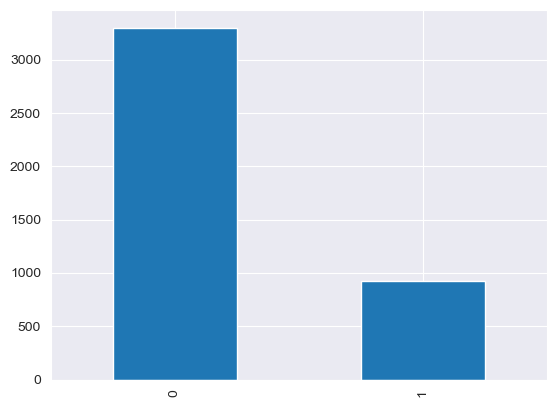


DEVICE_PROTECTION_YES
count    4225.000000
mean        0.351006
std         0.477341
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: device_protection_Yes, dtype: float64
0    0.648994
1    0.351006
Name: device_protection_Yes, dtype: float64


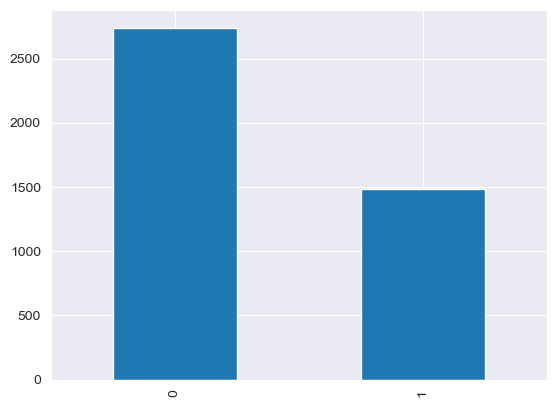


TECH_SUPPORT_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: tech_support_No internet service, dtype: float64
0    0.781538
1    0.218462
Name: tech_support_No internet service, dtype: float64


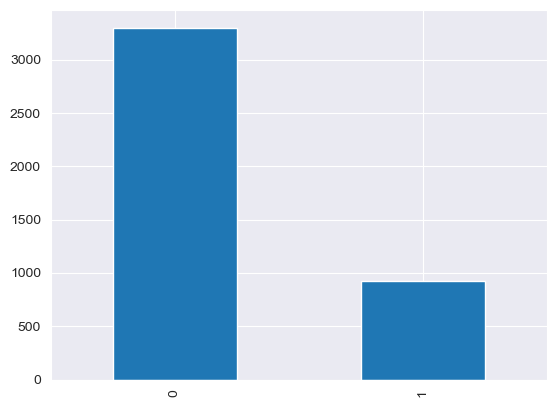


TECH_SUPPORT_YES
count    4225.000000
mean        0.289467
std         0.453569
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: tech_support_Yes, dtype: float64
0    0.710533
1    0.289467
Name: tech_support_Yes, dtype: float64


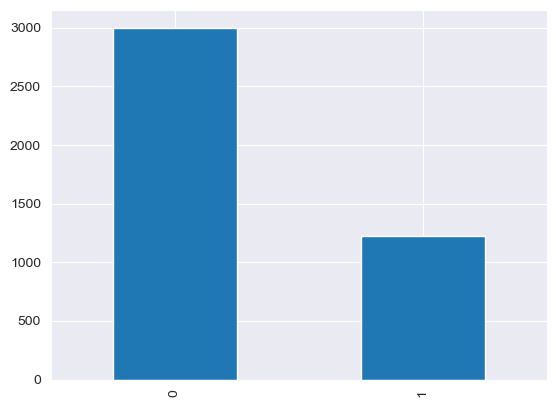


STREAMING_TV_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: streaming_tv_No internet service, dtype: float64
0    0.781538
1    0.218462
Name: streaming_tv_No internet service, dtype: float64


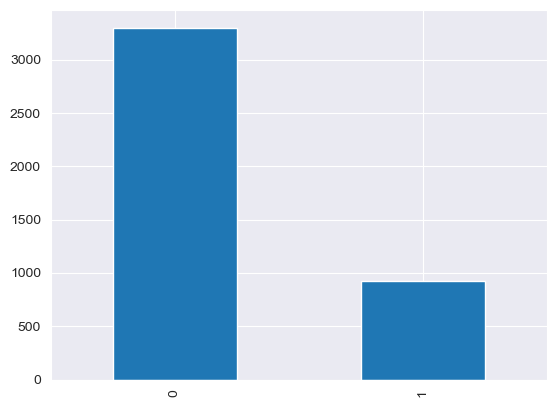


STREAMING_TV_YES
count    4225.000000
mean        0.392189
std         0.488296
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: streaming_tv_Yes, dtype: float64
0    0.607811
1    0.392189
Name: streaming_tv_Yes, dtype: float64


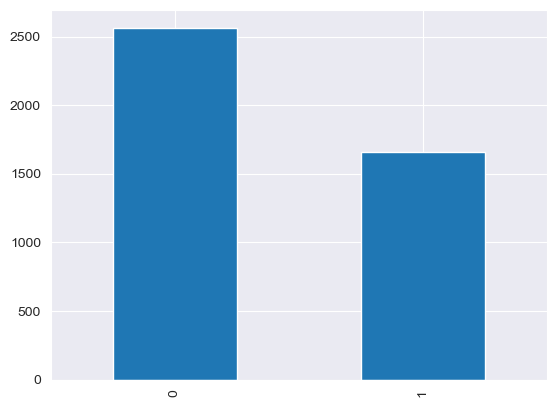


STREAMING_MOVIES_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: streaming_movies_No internet service, dtype: float64
0    0.781538
1    0.218462
Name: streaming_movies_No internet service, dtype: float64


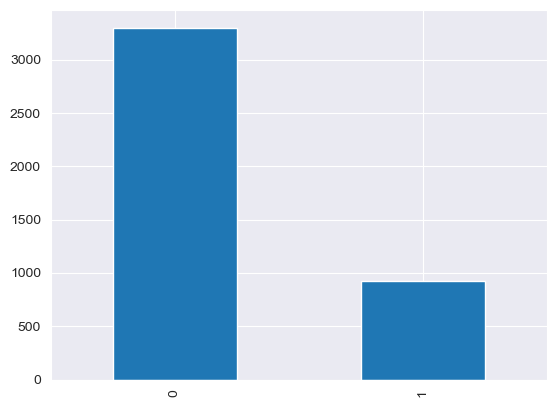


STREAMING_MOVIES_YES
count    4225.000000
mean        0.395503
std         0.489016
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: streaming_movies_Yes, dtype: float64
0    0.604497
1    0.395503
Name: streaming_movies_Yes, dtype: float64


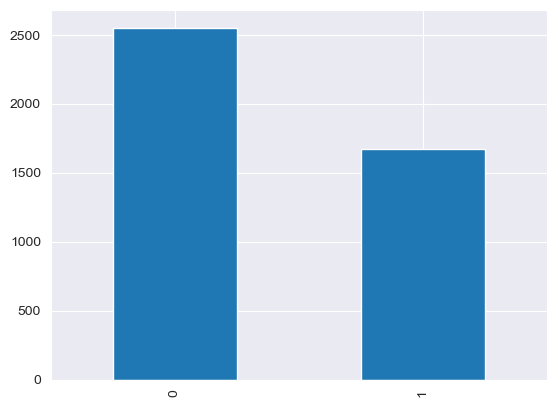


PAPERLESS_BILLING_YES
count    4225.000000
mean        0.593846
std         0.491172
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: paperless_billing_Yes, dtype: float64
1    0.593846
0    0.406154
Name: paperless_billing_Yes, dtype: float64


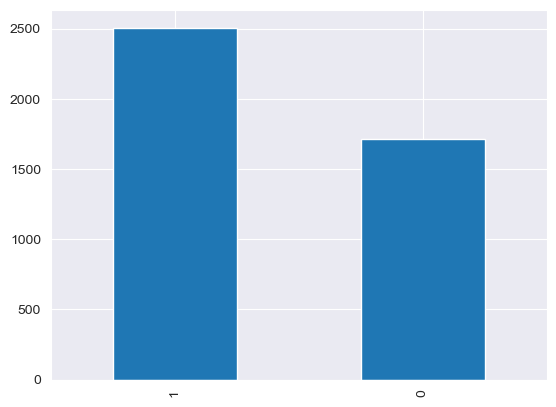


CHURN_YES
count    4225.000000
mean        0.265325
std         0.441559
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_Yes, dtype: float64
0    0.734675
1    0.265325
Name: churn_Yes, dtype: float64


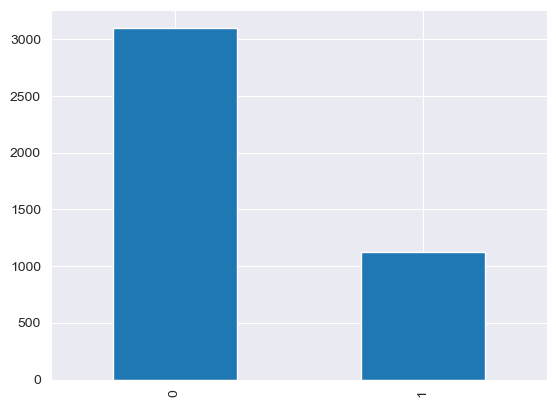


CONTRACT_TYPE_ONE YEAR
count    4225.000000
mean        0.216095
std         0.411628
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: contract_type_One year, dtype: float64
0    0.783905
1    0.216095
Name: contract_type_One year, dtype: float64


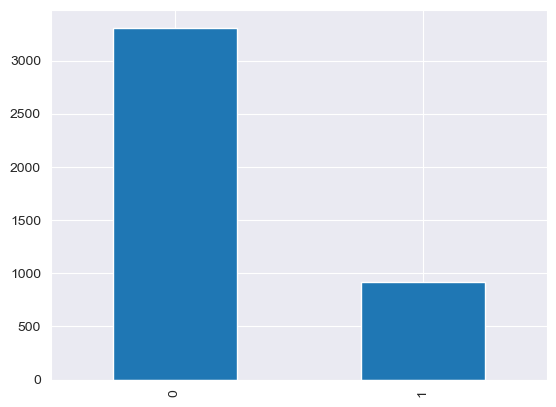


CONTRACT_TYPE_TWO YEAR
count    4225.000000
mean        0.235503
std         0.424363
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: contract_type_Two year, dtype: float64
0    0.764497
1    0.235503
Name: contract_type_Two year, dtype: float64


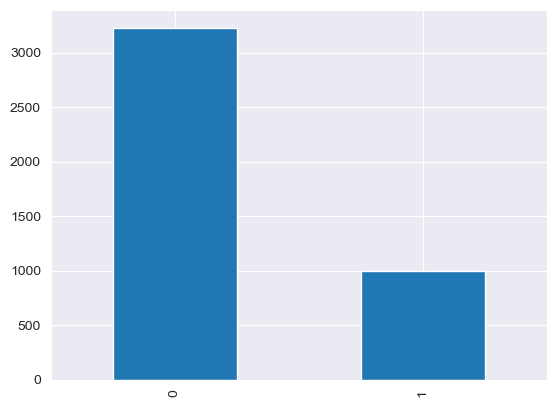


INTERNET_SERVICE_TYPE_FIBER OPTIC
count    4225.000000
mean        0.439053
std         0.496330
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: internet_service_type_Fiber optic, dtype: float64
0    0.560947
1    0.439053
Name: internet_service_type_Fiber optic, dtype: float64


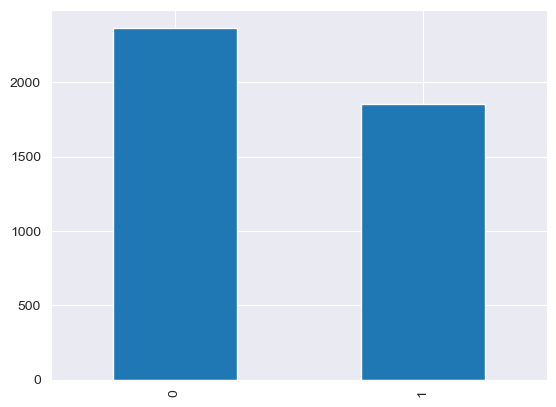


INTERNET_SERVICE_TYPE_NONE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: internet_service_type_None, dtype: float64
0    0.781538
1    0.218462
Name: internet_service_type_None, dtype: float64


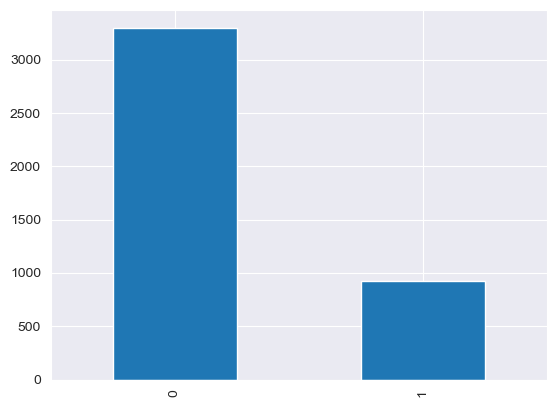

In [203]:
for col in col_cat:
    print(col.upper())
    print(train[col].describe())
    print(train[col].value_counts(normalize=True))
    train[col].value_counts().plot.bar()
    plt.show()
    print()

# Bivariate Stats

TENURE
count    4225.000000
mean       32.500828
std        24.532563
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


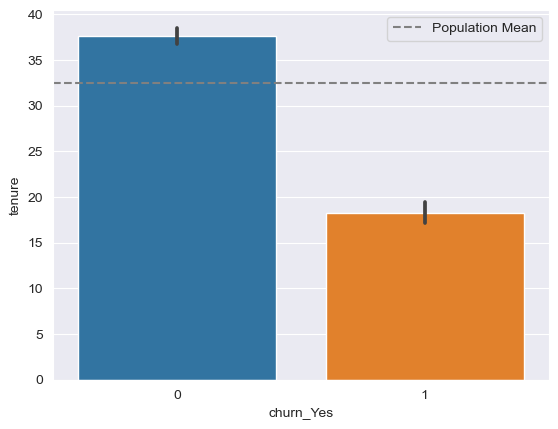


MONTHLY_CHARGES
count    4225.000000
mean       65.056142
std        30.268493
min        18.250000
25%        35.650000
50%        70.400000
75%        90.150000
max       118.750000
Name: monthly_charges, dtype: float64


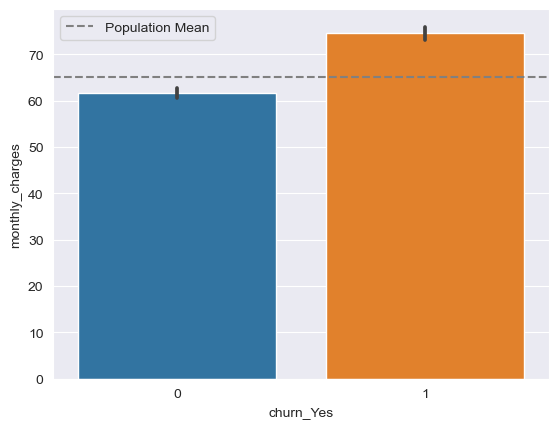


TOTAL_CHARGES
count    4225.000000
mean     2298.513598
std      2271.603284
min         0.000000
25%       411.600000
50%      1401.150000
75%      3865.450000
max      8672.450000
Name: total_charges, dtype: float64


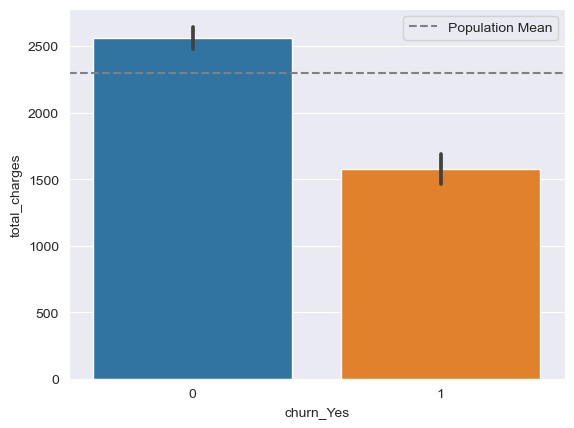

In [204]:
for col in col_num:
    print(col.upper())
    print(train[col].describe())
    pop_mean = train[col].mean()
    sns.barplot(data=train, x="churn_Yes", y=col)
    plt.axhline(pop_mean, ls='--', color='gray', label='Population Mean')
    plt.legend()
    plt.show()
    print()

GENDER_MALE
count    4225.000000
mean        0.508639
std         0.499985
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender_Male, dtype: float64


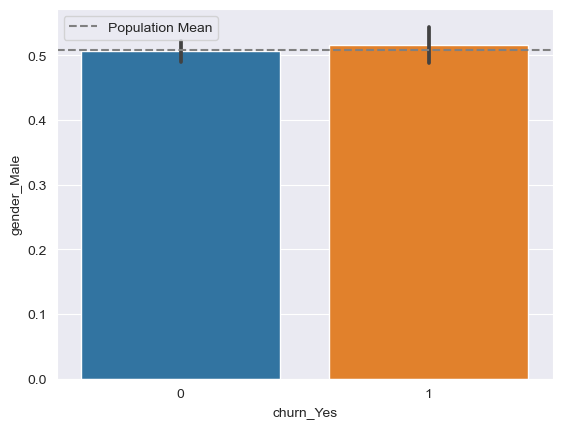


SENIOR_CITIZEN_YES
count    4225.000000
mean        0.161893
std         0.368397
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen_Yes, dtype: float64


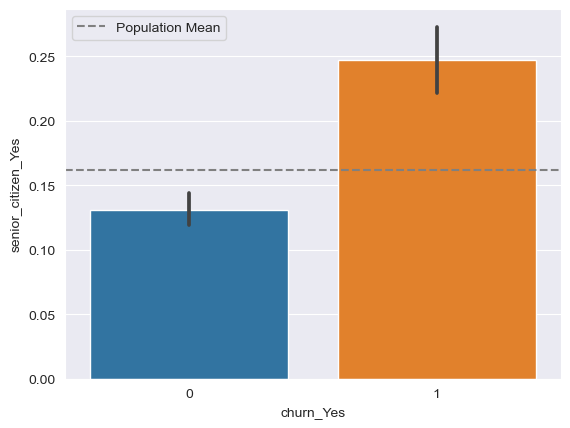


PARTNER_YES
count    4225.000000
mean        0.488521
std         0.499927
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner_Yes, dtype: float64


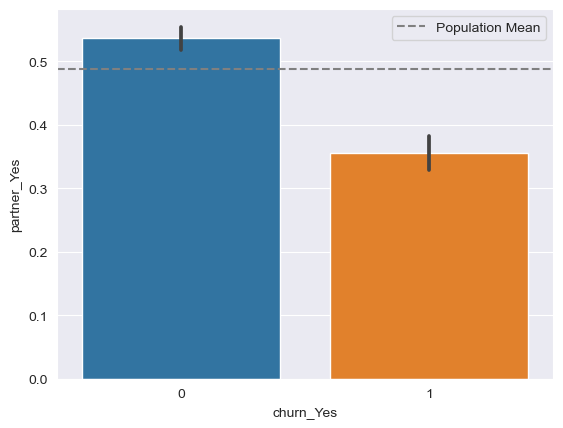


DEPENDENTS_YES
count    4225.000000
mean        0.306272
std         0.460999
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dependents_Yes, dtype: float64


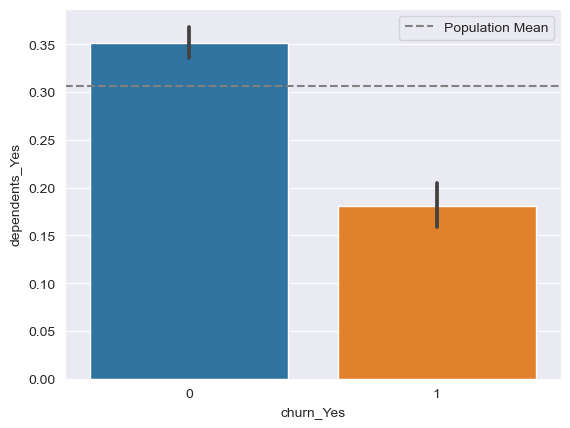


PHONE_SERVICE_YES
count    4225.000000
mean        0.906982
std         0.290492
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone_service_Yes, dtype: float64


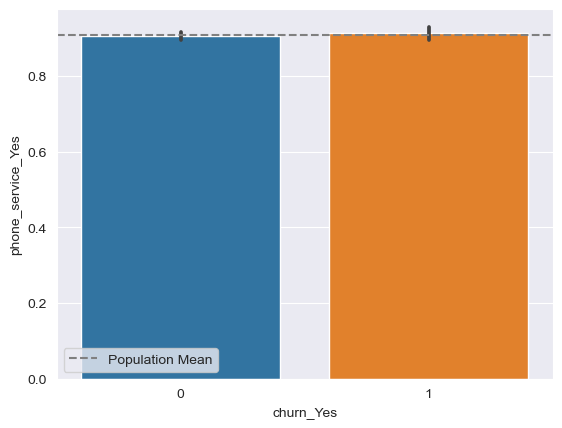


MULTIPLE_LINES_NO PHONE SERVICE
count    4225.000000
mean        0.093018
std         0.290492
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: multiple_lines_No phone service, dtype: float64


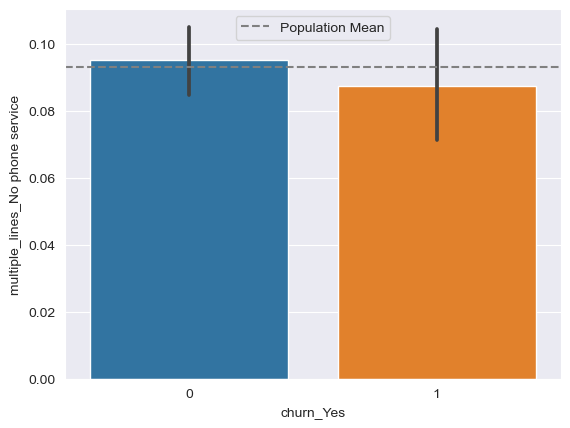


MULTIPLE_LINES_YES
count    4225.000000
mean        0.427692
std         0.494803
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: multiple_lines_Yes, dtype: float64


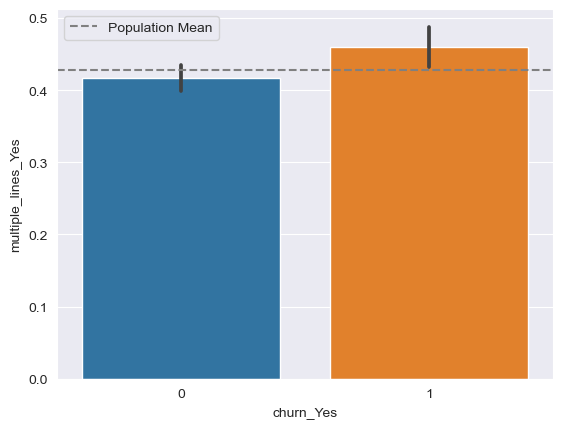


ONLINE_SECURITY_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: online_security_No internet service, dtype: float64


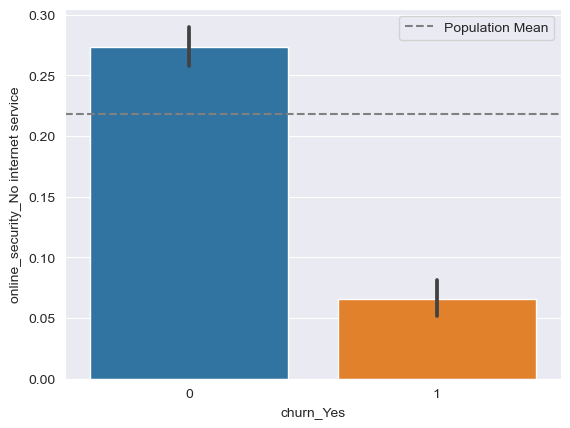


ONLINE_SECURITY_YES
count    4225.000000
mean        0.291598
std         0.454552
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: online_security_Yes, dtype: float64


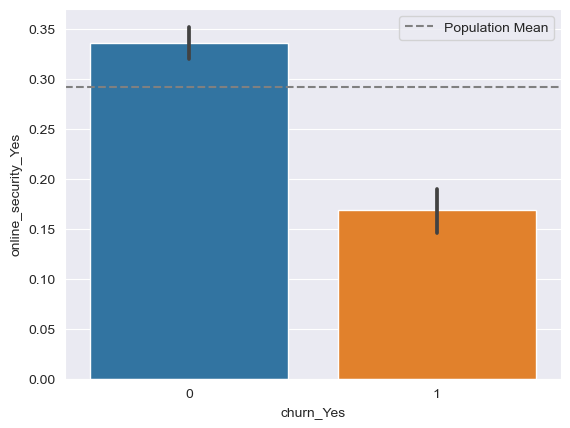


ONLINE_BACKUP_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: online_backup_No internet service, dtype: float64


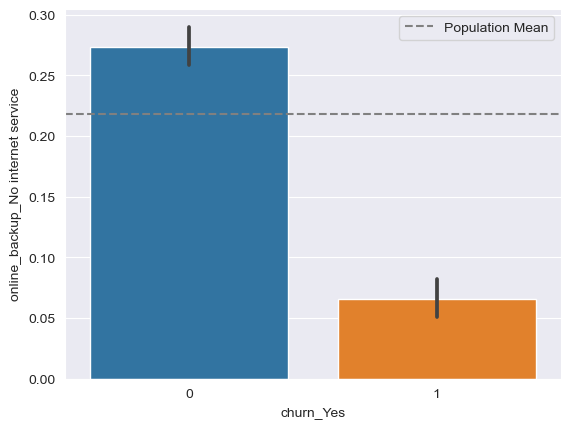


ONLINE_BACKUP_YES
count    4225.000000
mean        0.350059
std         0.477045
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: online_backup_Yes, dtype: float64


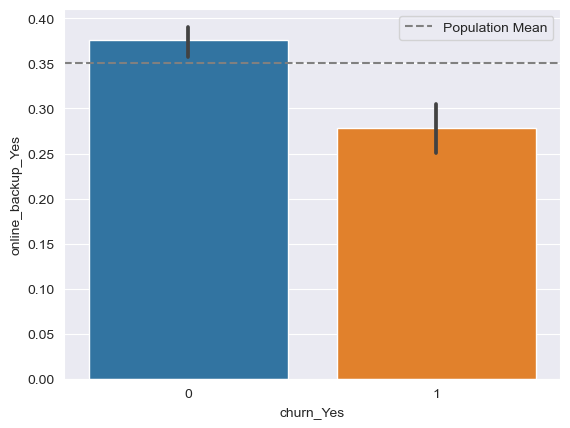


DEVICE_PROTECTION_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: device_protection_No internet service, dtype: float64


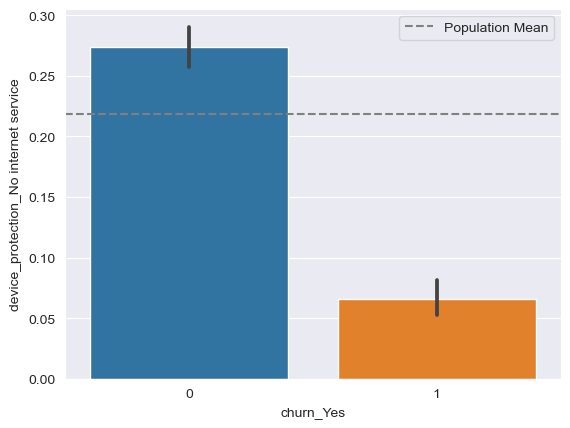


DEVICE_PROTECTION_YES
count    4225.000000
mean        0.351006
std         0.477341
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: device_protection_Yes, dtype: float64


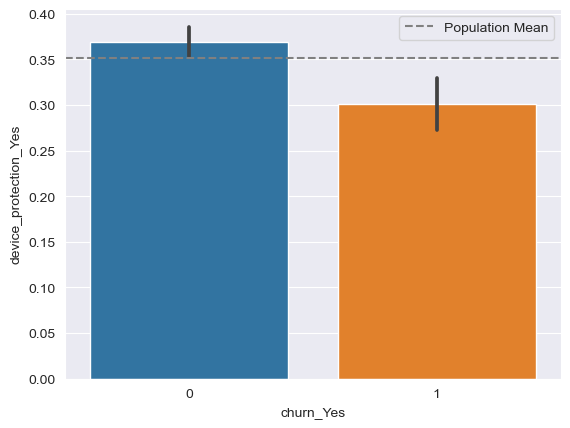


TECH_SUPPORT_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: tech_support_No internet service, dtype: float64


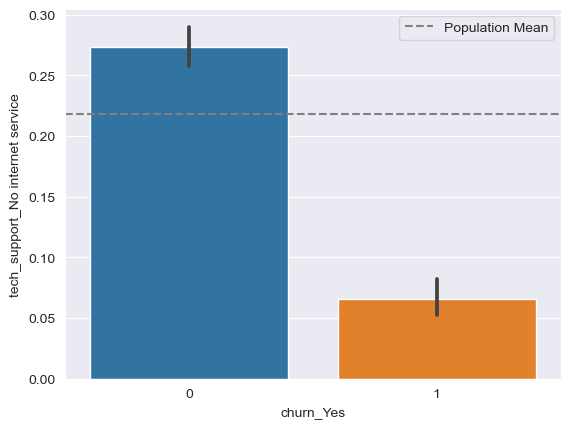


TECH_SUPPORT_YES
count    4225.000000
mean        0.289467
std         0.453569
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: tech_support_Yes, dtype: float64


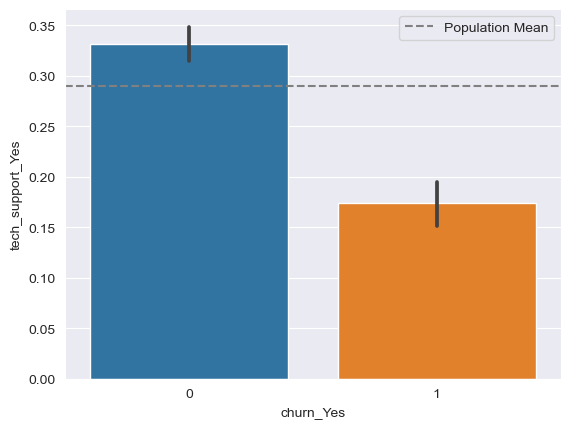


STREAMING_TV_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: streaming_tv_No internet service, dtype: float64


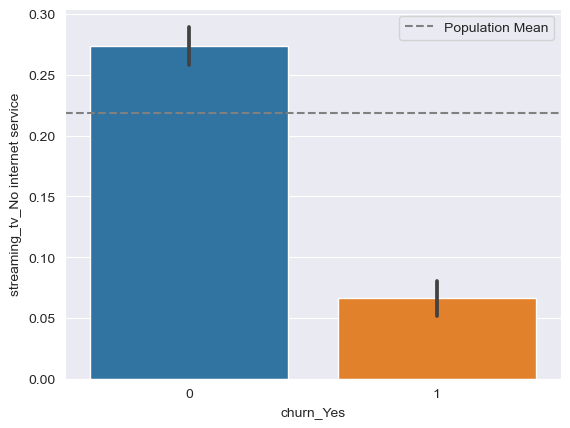


STREAMING_TV_YES
count    4225.000000
mean        0.392189
std         0.488296
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: streaming_tv_Yes, dtype: float64


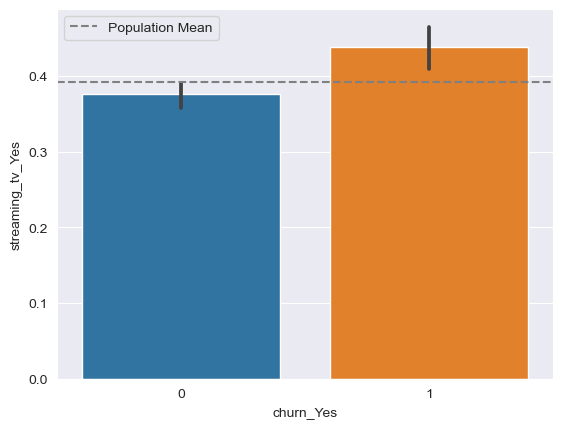


STREAMING_MOVIES_NO INTERNET SERVICE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: streaming_movies_No internet service, dtype: float64


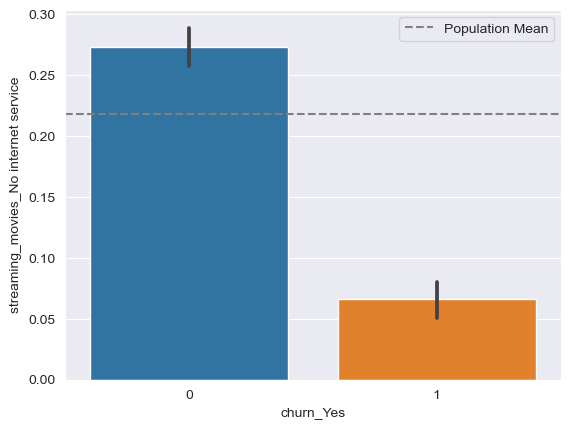


STREAMING_MOVIES_YES
count    4225.000000
mean        0.395503
std         0.489016
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: streaming_movies_Yes, dtype: float64


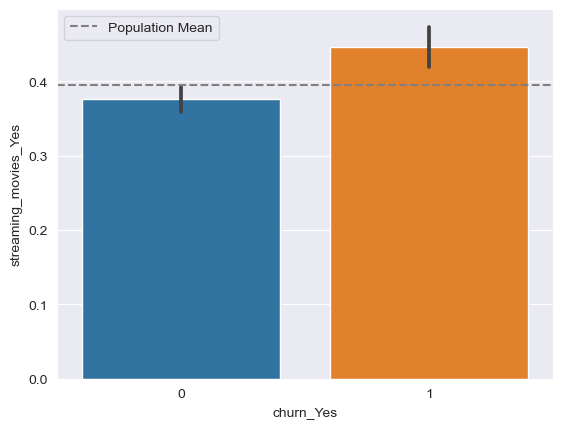


PAPERLESS_BILLING_YES
count    4225.000000
mean        0.593846
std         0.491172
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: paperless_billing_Yes, dtype: float64


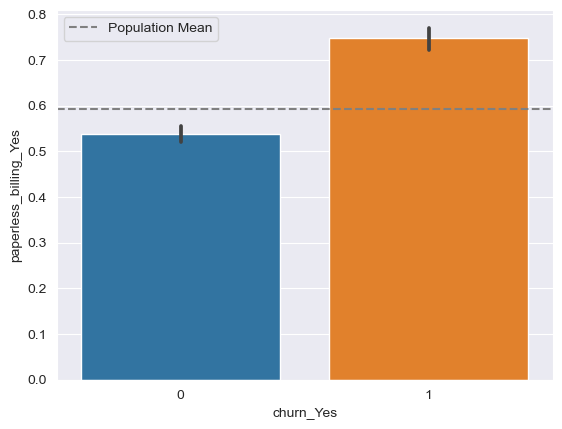


CHURN_YES
count    4225.000000
mean        0.265325
std         0.441559
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_Yes, dtype: float64


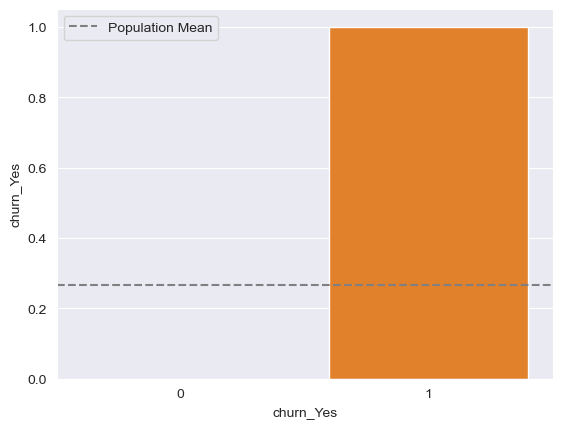


CONTRACT_TYPE_ONE YEAR
count    4225.000000
mean        0.216095
std         0.411628
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: contract_type_One year, dtype: float64


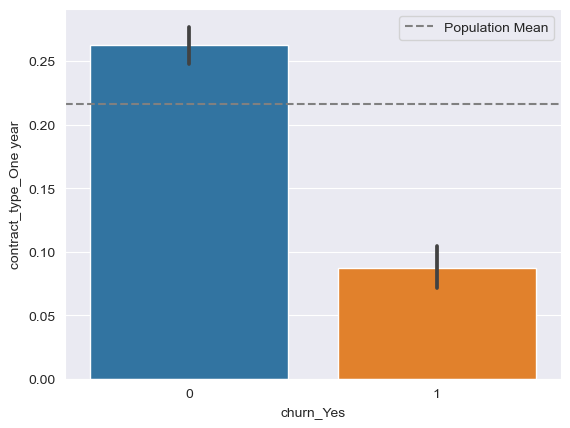


CONTRACT_TYPE_TWO YEAR
count    4225.000000
mean        0.235503
std         0.424363
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: contract_type_Two year, dtype: float64


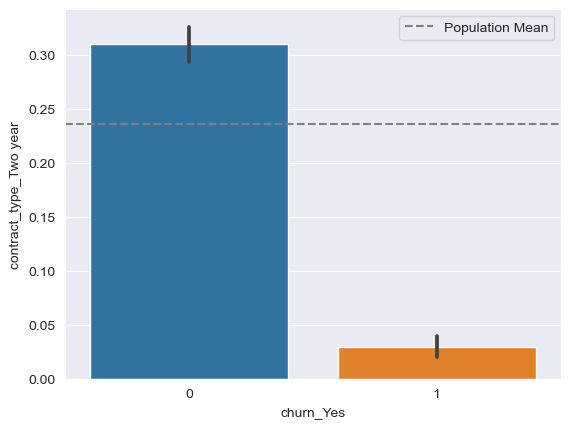


INTERNET_SERVICE_TYPE_FIBER OPTIC
count    4225.000000
mean        0.439053
std         0.496330
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: internet_service_type_Fiber optic, dtype: float64


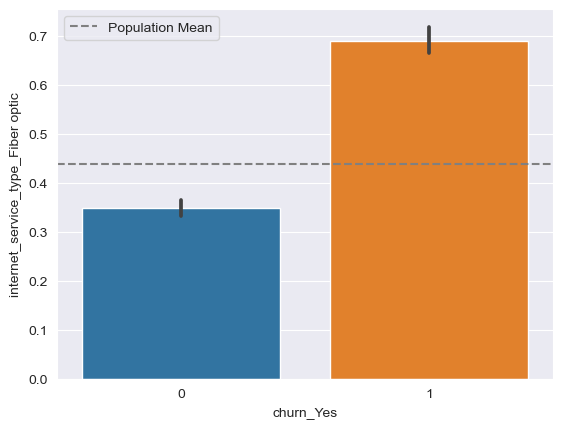


INTERNET_SERVICE_TYPE_NONE
count    4225.000000
mean        0.218462
std         0.413251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: internet_service_type_None, dtype: float64


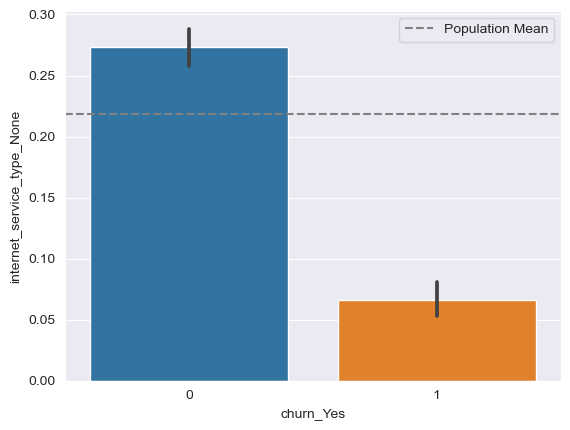

In [205]:
for col in col_cat:
    print(col.upper())
    print(train[col].describe())
    pop_mean = train[col].mean()
    sns.barplot(data=train, x="churn_Yes", y=col)
    plt.axhline(pop_mean, ls='--', color='gray', label='Population Mean')
    plt.legend()
    plt.show()
    print()

In [206]:
import IPython.display
import scipy.stats as stats
abs(train.corr())

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
tenure,1.000000,0.247130,0.823935,0.012011,0.022277,0.382534,0.160388,0.001655,0.001655,0.324179,...,0.269309,0.012465,0.348330,0.202455,0.559881,0.022670,0.042997,0.225785,0.212851,0.242165
monthly_charges,0.247130,1.000000,0.654277,0.009653,0.216038,0.107835,0.110436,0.240472,0.240472,0.496072,...,0.635009,0.346382,0.188467,0.000447,0.069769,0.787106,0.768142,0.026555,0.262278,0.355673
total_charges,0.823935,0.654277,1.000000,0.005257,0.102329,0.324742,0.065695,0.107560,0.107560,0.468521,...,0.511135,0.158820,0.192130,0.168912,0.355656,0.368717,0.380995,0.178475,0.065219,0.291629
gender_Male,0.012011,0.009653,0.005257,1.000000,0.005258,0.016888,0.003265,0.003431,0.003431,0.002977,...,0.007684,0.022342,0.008381,0.008757,0.028002,0.009087,0.000543,0.006381,0.009223,0.021312
senior_citizen_Yes,0.022277,0.216038,0.102329,0.005258,1.000000,0.028089,0.206994,0.005805,0.005805,0.147355,...,0.121525,0.154137,0.139013,0.035609,0.118246,0.244305,0.182607,0.023020,0.165358,0.162835
partner_Yes,0.382534,0.107835,0.324742,0.016888,0.028089,1.000000,0.447724,0.019544,0.019544,0.139963,...,0.125581,0.009351,0.159401,0.093163,0.239835,0.001712,0.010204,0.090727,0.077309,0.105585
dependents_Yes,0.160388,0.110436,0.065695,0.003265,0.206994,0.447724,1.000000,0.011252,0.011252,0.023283,...,0.052278,0.109193,0.163208,0.057855,0.210880,0.161549,0.140810,0.057920,0.137791,0.055398
phone_service_Yes,0.001655,0.240472,0.107560,0.003431,0.005805,0.019544,0.011252,1.000000,1.000000,0.276844,...,0.030943,0.002292,0.011578,0.009751,0.006620,0.283323,0.169315,0.002996,0.004544,0.008524
multiple_lines_No phone service,0.001655,0.240472,0.107560,0.003431,0.005805,0.019544,0.011252,1.000000,1.000000,0.276844,...,0.030943,0.002292,0.011578,0.009751,0.006620,0.283323,0.169315,0.002996,0.004544,0.008524
multiple_lines_Yes,0.324179,0.496072,0.468521,0.002977,0.147355,0.139963,0.023283,0.276844,0.276844,1.000000,...,0.273295,0.163573,0.038528,0.001763,0.094083,0.370781,0.219702,0.061402,0.077329,0.231827


# $H_{o}$: there is no correlation between churn and tenure
# $H_{a}$: there is a correlation between churn and tenure

In [207]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.churn_Yes, train['tenure']))
print(f"chi2 = {chi2}")
print(f"p = {p}")
acquire.eval_results(p)

chi2 = 674.1459541851318
p = 1.3020207852716985e-98
We reject the null hypothesis


# $H_{o}$: there is no correlation between churn and fiber optic
# $H_{a}$: there is a correlation between churn and fiber optic

In [208]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.churn_Yes, train['internet_service_type_Fiber optic']))
print(f"chi2 = {chi2}")
print(f"p = {p}")
acquire.eval_results(p)


chi2 = 387.4117221686711
p = 3.0293763443640615e-86
We reject the null hypothesis


# $H_{o}$: there is no correlation between churn and payment type electronic check
# $H_{a}$: there is a correlation between churn and payment type electronic check

In [209]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.churn_Yes, train['payment_type_Electronic check']))
print(f"chi2 = {chi2}")
print(f"p = {p}")
acquire.eval_results(p)

chi2 = 381.57600369890343
p = 5.647318991682941e-85
We reject the null hypothesis


# $H_{o}$: there is no correlation between churn and contract type two year
# $H_{a}$: there is a correlation between churn and contract type two year

In [210]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.churn_Yes, train['contract_type_Two year']))
print(f"chi2 = {chi2}")
print(f"p = {p}")
acquire.eval_results(p)

chi2 = 358.31468836862257
p = 6.5547793791877045e-80
We reject the null hypothesis


In [211]:
telco['addon_services'] = telco.online_security_Yes.astype(int) + telco.online_backup_Yes.astype(int) + telco.device_protection_Yes.astype(int) + telco.tech_support_Yes.astype(int) + telco.streaming_tv_Yes.astype(int) + telco.streaming_movies_Yes.astype(int)

In [212]:
telco["churn"]= telco.churn_Yes.astype(int)


<Axes: xlabel='addon_services', ylabel='Count'>

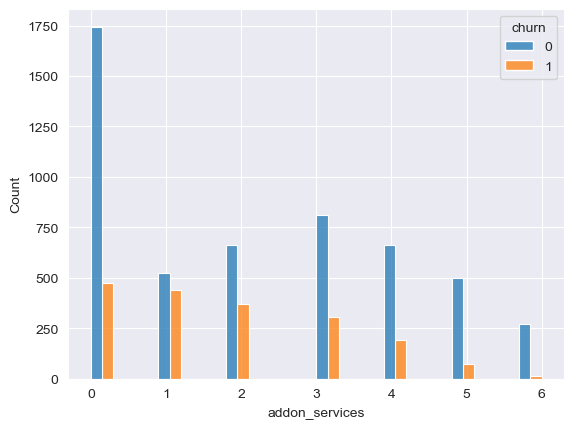

In [213]:
sns.histplot(data=telco, x="addon_services", hue="churn", multiple="dodge")

In [214]:
#$H_{o}$: there is no correlation between churn and addon services
#$H_{a}$: there is a correlation between churn and addon services
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(telco.churn, telco['addon_services']))
print(f"chi2 = {chi2}")
print(f"p = {p}")
acquire.eval_results(p)

chi2 = 390.94299753934877
p = 2.4739281727305314e-81
We reject the null hypothesis


In [215]:
train.shape

(4225, 31)

<Axes: xlabel='tech_support_Yes', ylabel='Count'>

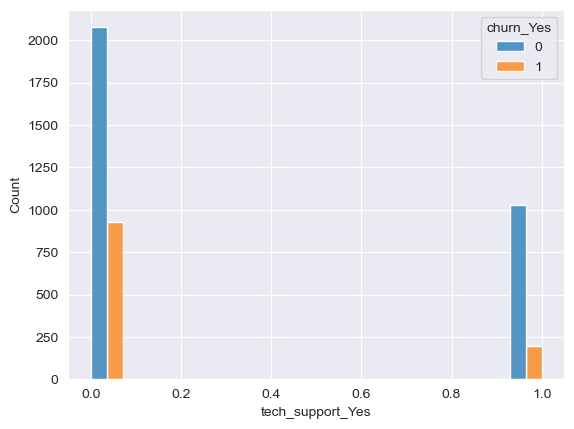

In [216]:
sns.histplot(data=train, x="tech_support_Yes", hue="churn_Yes", multiple="dodge")